In [1]:
import scipy.io as sio
import numpy as np
import pandas as pd 

In [2]:
import sys
sys.path.append('/home/keeganfl/Desktop/Work_Fall_2021/Fall_2021_Work_journal/tools/')

In [3]:
# import plastid
# data structure for mapping read alignments to genomic positions
from plastid import BAMGenomeArray, GenomeArray, VariableFivePrimeMapFactory, \
                        GTF2_TranscriptAssembler, GFF3_TranscriptAssembler, \
                        Transcript, ThreePrimeMapFactory, CenterMapFactory
import plastid
from plastid.plotting.plots import *
import numpy as np
import os
from Bio import SeqIO
import numpy
import math
import pandas as pd
from scipy import stats
import keegan_analysis_tools as kat
from statsmodels.nonparametric.smoothers_lowess import lowess
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from scipy.sparse.linalg import lsqr

In [4]:
# Define the path to our Bam files
data_path = "/home/keeganfl/Desktop/Work_Fall_2021/genomes_&_samples/dmel/"
feat_counts_path = "/home/keeganfl/Desktop/Work_Fall_2021/feature_counts/dmel/"
te_path = "/home/keeganfl/Desktop/Work_Fall_2021/data_tables/TE_tables/dmel/"
p_site_path = "/home/keeganfl/Desktop/Work_Fall_2021/data_tables/p-site_offsets/dmel/"
gtf_name = "Drosophila_melanogaster.BDGP6.32.103.gtf"
count_path = '/home/keeganfl/Desktop/Work_Fall_2021/data_tables/position_counts/dmel/'
mutation = 'Fmr1'
samp_num = '2'

In [5]:
te_table_mutant = pd.read_csv(te_path + mutation + '_' + samp_num + '_' + "te_tablefc"  + ".csv")
te_table_control = pd.read_csv(te_path + 'control_' + samp_num + '_' + "te_tablefc" + ".csv")

In [6]:
data_mutant = kat.load_count_positions(mutation+"_RPF_"+samp_num+"_counts.csv",count_path)
data_control = kat.load_count_positions("control_RPF_"+ samp_num +"_counts.csv",count_path)

In [7]:
my_gene = "lost"
te_table_mutant[te_table_mutant["gene_name"] == my_gene]

,transcript_ID,gene_ID,gene_name,TE_tpm,TE_rpkm,ribosome_profiling_tpm,RNA-seq_tpm,ribosome_profiling_counts,RNA-seq_counts,ribosome_profiling_rpkm,RNA-seq_rpkm,ribosome_profiling_rpk,RNA-seq_rpk,ribosome_profiling_lengths,RNA-seq_lengths
17851,FBtr0078921,FBgn0263594,lost,0.286055,0.307176,434.710273,1519.671439,3273.0,90694,252.282467,821.295545,1216.276477,33.702713,2691,2691


In [8]:
profile = np.array((data_mutant[17851]+1), dtype = 'd')
density = te_table_mutant.iloc[17851]["TE_tpm"]

In [9]:
test = {"Density": density, "Profile": profile}

In [28]:
sio.savemat(my_gene + '_test.mat', test)

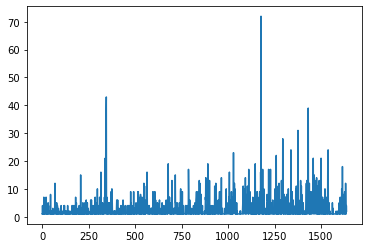

In [10]:
plt.plot(profile)

In [ ]:
my_vec

In [ ]:
# 30-codon sliding window average
window = np.ones(90).astype(float)/90.0
sliding_window_avg = np.convolve(my_vector,window,mode="valid")


# plot
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(my_vector,label="%s counts" % my_transcript.get_name())
plt.plot(sliding_window_avg,label="30 codon average")
plt.xlabel("Position in transcript (5' to 3')")
plt.ylabel("Ribosome counts")

# add outlines at start & stop codons
plt.axvline(my_transcript.cds_start,color="#999999",dashes=[3,2],zorder=-1)
plt.axvline(my_transcript.cds_end,color="#999999",dashes=[3,2],zorder=-1)